In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from astropy.io import fits
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

In [3]:
filename = "/Users/timotheschmidt/Documents/MINES/2A/Stage PNU/Simu/DATA_SIMS/Output00034_size0128_hyperCube.fits"
file = fits.open(filename)


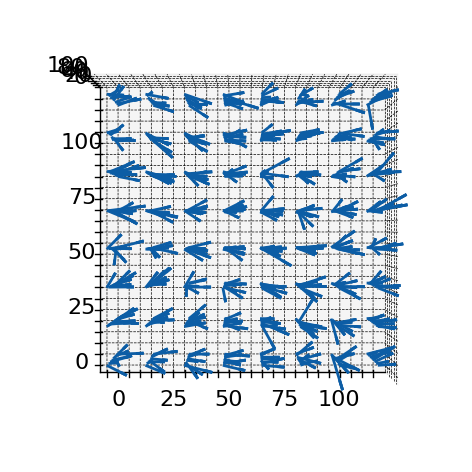

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x, y, z = np.meshgrid(np.arange(0, 128, 16),
                      np.arange(0, 128, 16),
                      np.arange(0, 128, 16)
                     )

u = file[4].data[x,y,z]
v = file[5].data[x,y,z]
w = file[6].data[x,y,z]

norm  = u**2 + v**2 + w**2

ax.quiver(x, y, z, u, v, w, length=2)
#ax.view_init(elev=90, azim=-90)           #to see along the line of sight

plt.show()

In [17]:
X, Y = np.meshgrid(np.arange(0, 128, 16),
                      np.arange(0, 128, 16))
U = file[4].data[X,Y,0]
V = file[5].data[X,Y,0]
norm = np.sqrt(U**2 + V**2)

Text(0.5, 1.0, 'Magnetic field for z = 0')

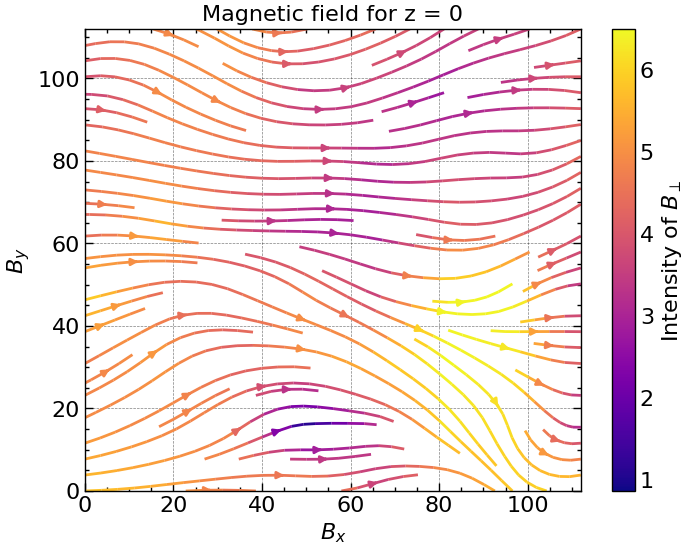

In [26]:
plt.streamplot(X, Y, U, V, cmap='plasma', color=norm)
plt.colorbar(label='Intensity of $B_{\perp}$')
plt.xlabel('$B_x$')
plt.ylabel('$B_y$')
plt.title('Magnetic field for z = 0')

In [83]:
X, Y = np.meshgrid(np.arange(0, 128, 16),
                      np.arange(0, 128, 16))
U_mean = np.mean(file[4].data, 0)[X, Y]
V_mean = np.mean(file[5].data, 0)[X, Y]
norm = np.sqrt(U**2 + V**2)

Text(0.5, 1.0, 'Mean magnetic field along the z axis')

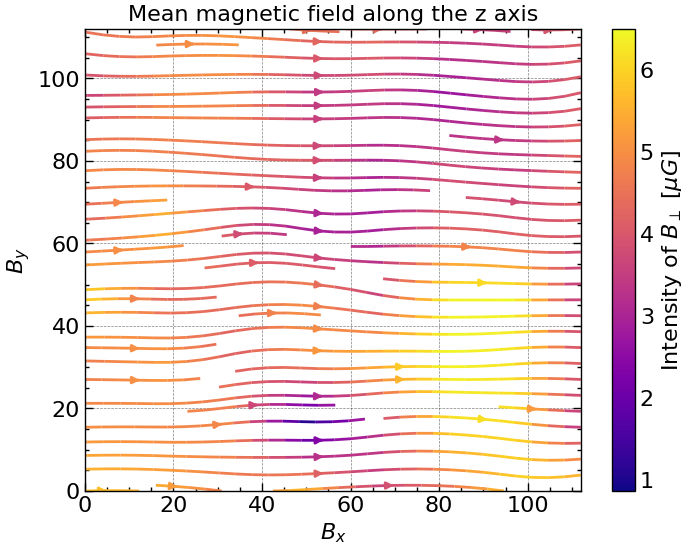

In [84]:
plt.streamplot(X, Y, U_mean, V_mean, cmap='plasma', color=norm)
plt.colorbar(label='Intensity of $B_{\perp}$ [$\mu G$]')
plt.xlabel('$B_x$')
plt.ylabel('$B_y$')
plt.title('Mean magnetic field along the z axis')

Text(0.5, 1.0, 'Density ')

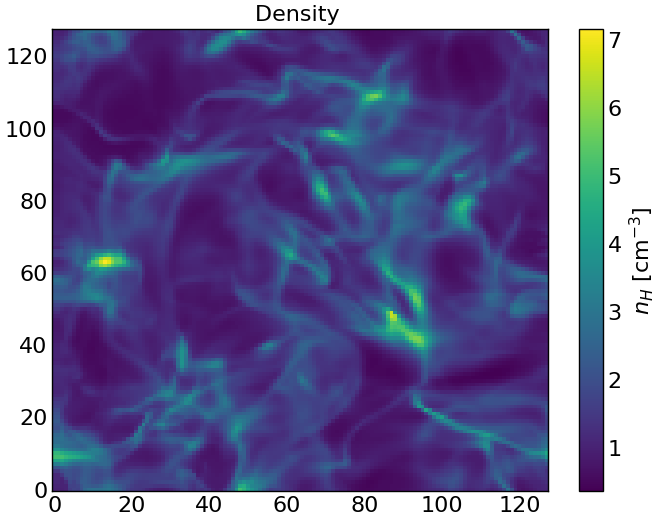

In [86]:
X, Y = np.meshgrid(np.arange(0, 128, 1),
                      np.arange(0, 128, 1))

Z = np.mean(file[0].data, 0)[X, Y]

plt.pcolormesh(X, Y, Z)
plt.colorbar(label = '$n_H$ [cm$^{-3}$]')
plt.title('Density ')

In [68]:
def Stokes_xy(file,x,y):
    n = 128
    dz = 1
    p_0 = 1
    S = [0,0]
    for z in range(n):
        rho, b_x, b_y, b_z = file[0].data[x,y,z], file[4].data[x,y,z], file[5].data[x,y,z], file[6].data[x,y,z]
        b_norm = np.sqrt(b_x**2 + b_y**2 + b_z**2)
        S[0] += rho * p_0 *(b_x**2 - b_y**2)/b_norm**2 * dz
        S[1] += 2 * rho * p_0 * b_x * b_y /b_norm**2 * dz
    return S

def psi(Q,U):
    return np.arctan(U/Q)

def psi_tab(file):
    n = 128
    tab = np.zeros((n,n))
    for x in range(n):
        for y in range(n):
            S = Stokes_xy(file, x, y)
            Q, U = S[0], S[1]
            tab[x,y] = psi(Q,U)
    return tab


def sigma_psi_global(file):
    return np.std(psi_tab(file))*180/np.pi

def sigma_psi_line(file):
    """returns an array of sigma_psi of each line"""
    return np.std(psi_tab(file), 0)*180/np.pi

In [75]:
sigma_psi_global = sigma_psi_global(file)
Sigma = sigma_psi_line(file)

Text(0, 0.5, '$\\sigma _\\psi$')

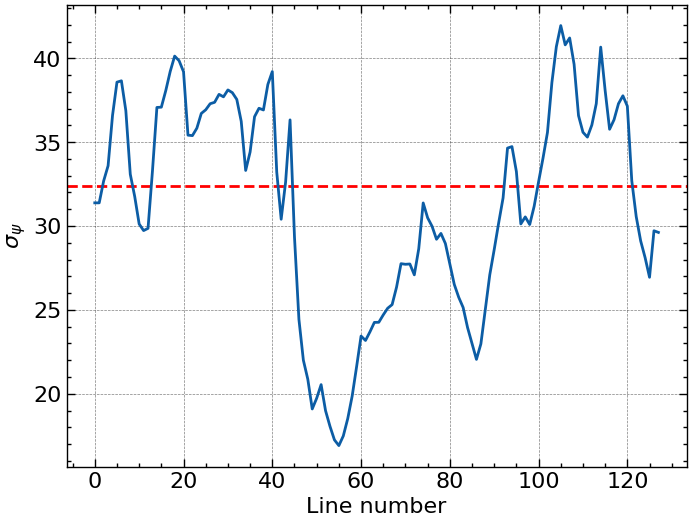

In [77]:
X = np.arange(0,128, 1)
plt.axhline(sigma_psi_global, color = 'r', linestyle = '--')
plt.plot(X, Sigma)
plt.xlabel('Line number')
plt.ylabel('$\sigma _\psi$')

In [ ]:
def psi_tab2(file):
    n = 128
    tab = np.zeros((n,n))
    for x in range(n):
        for y in range(n):
            S = Stokes_xy(file, x, y)
            Q, U = S[0], S[1]
            tab[x,y] = psi(Q,U)

    tab = psi(Stokes_xy(file,x,y)[0],)Stokes_xy(file,x,y)[0]
    return tab